In [1]:
!pip install tensorflow pandas scikit-learn



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

In [2]:
import tensorflow as tf

def call_rmsle(y_true, y_pred):
    # Ensure predictions and true values are positive by adding 1
    y_true = tf.math.maximum(y_true, 0)
    y_pred = tf.math.maximum(y_pred, 0)

    # Compute the logarithm of the true and predicted values
    log_true = tf.math.log1p(y_true)
    log_pred = tf.math.log1p(y_pred)

    # Compute the squared difference
    squared_diff = tf.math.square(log_true - log_pred)

    # Compute the mean of the squared differences
    mean_squared_diff = tf.math.reduce_mean(squared_diff)

    # Return the square root of the mean squared differences
    return tf.math.sqrt(mean_squared_diff)



In [3]:
df_all    = pd.read_csv('data_dir/wip_data/preprocessed_train_data_v1.csv',index_col=0)

In [4]:
df_all.tail()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,day,day_of_week,week_of_month,week_number,sales
3000883,3000883,2017-08-15,9,28,0,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,438.133
3000884,3000884,2017-08-15,9,29,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,154.553
3000885,3000885,2017-08-15,9,30,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,2419.729
3000886,3000886,2017-08-15,9,31,1,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,121.000
3000887,3000887,2017-08-15,9,32,0,18,12,1,6,4,0.0,47.57,8,2017,15,2,3,33,16.000


In [5]:
df    = df_all[(df_all['store_nbr']==10) & (df_all['family']==27)]
df.shape
#df[df['id'].duplicated()]

(1684, 19)

In [6]:
df.columns

# Convert month and day to cyclical features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['wom_sin'] = np.sin(2 * np.pi * df['week_of_month'] / 5)
df['wom_cos'] = np.cos(2 * np.pi * df['week_of_month'] / 5)

df['week_sin'] = np.sin(2 * np.pi * df['week_number'] / 52)
df['week_cos'] = np.cos(2 * np.pi * df['week_number'] / 52)



df['is_weekend'] = df['day_of_week'].isin([0, 6]).astype('int')
df['is_midweek'] = df['day_of_week'].isin([3, 4]).astype('int')

#removing sales = 0 rows

df = df[df['sales']>0]
df['year'] = df['year']-df['year'].min()


C:\Users\Monil\AppData\Local\Temp\ipykernel_30552\254768680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
C:\Users\Monil\AppData\Local\Temp\ipykernel_30552\254768680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
C:\Users\Monil\AppData\Local\Temp\ipykernel_30552\254768680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [7]:
df.head(100)

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,day,day_of_week,week_of_month,week_number,sales,month_sin,month_cos,day_sin,day_cos,wom_sin,wom_cos,week_sin,week_cos,is_weekend,is_midweek
650490,650490,2014-01-02,10,27,0,18,12,2,15,4,0.0,95.14,1,0,2,4,1,1,10.0,0.5,8.660254e-01,0.394356,0.918958,0.951057,0.309017,0.120537,9.927089e-01,0,1
652272,652272,2014-01-03,10,27,0,18,12,2,15,4,0.0,93.66,1,0,3,5,1,1,7.0,0.5,8.660254e-01,0.571268,0.820763,0.951057,0.309017,0.120537,9.927089e-01,0,0
654054,654054,2014-01-04,10,27,0,18,12,2,15,4,0.0,93.12,1,0,4,6,1,1,6.0,0.5,8.660254e-01,0.724793,0.688967,0.951057,0.309017,0.120537,9.927089e-01,1,0
655836,655836,2014-01-05,10,27,0,18,12,2,15,4,0.0,93.12,1,0,5,0,1,1,4.0,0.5,8.660254e-01,0.848644,0.528964,0.951057,0.309017,0.120537,9.927089e-01,1,0
657618,657618,2014-01-06,10,27,0,18,12,2,15,4,0.0,93.12,1,0,6,1,1,2,2.0,0.5,8.660254e-01,0.937752,0.347305,0.951057,0.309017,0.239316,9.709418e-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112028,1112028,2014-09-18,10,27,0,18,12,2,15,4,0.0,93.07,9,0,18,4,3,38,5.0,-1.0,-1.836970e-16,-0.485302,-0.874347,-0.587785,-0.809017,-0.992709,-1.205367e-01,0,1
1115592,1115592,2014-09-20,10,27,0,18,12,2,15,4,0.0,91.46,9,0,20,6,3,38,2.0,-1.0,-1.836970e-16,-0.790776,-0.612106,-0.587785,-0.809017,-0.992709,-1.205367e-01,1,0
1117374,1117374,2014-09-21,10,27,0,18,12,2,15,4,0.0,91.46,9,0,21,0,3,38,3.0,-1.0,-1.836970e-16,-0.897805,-0.440394,-0.587785,-0.809017,-0.992709,-1.205367e-01,1,0
1119156,1119156,2014-09-22,10,27,0,18,12,2,15,4,0.0,91.46,9,0,22,1,4,39,1.0,-1.0,-1.836970e-16,-0.968077,-0.250653,-0.951057,0.309017,-1.000000,-1.836970e-16,0,0


In [10]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Features to be scaled
features_to_scale = ['holiday_type', 'oil_price', 'year']
# Features to be left unscaled (those ending with 'sin' or 'cos')
features_to_leave = ['onpromotion', 'IS_HOLIDAY',  'month_sin','month_cos',
         'day_sin','day_cos',  'wom_sin','wom_cos', 'week_sin','week_cos','is_weekend','is_midweek' ]

features = features_to_scale+features_to_leave
target = 'sales'
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, shuffle=False)

##########Experiment: Allowing data leakage#######
X_train = df[features]
y_train = df[target]
###################################################


# Initialize scalers
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the selected features
X_train_scaled_part = feature_scaler.fit_transform(X_train[features_to_scale])
X_test_scaled_part = feature_scaler.transform(X_test[features_to_scale])

# Combine scaled features with unscaled features (still as NumPy arrays)
X_train_scaled = np.hstack((X_train_scaled_part, X_train[features_to_leave].values))
X_test_scaled = np.hstack((X_test_scaled_part, X_test[features_to_leave].values))

# Scale target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to fit LSTM input shape (num_samples, timesteps, num_features)
timesteps = 1  # You need to define this based on your data and model requirements
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))


# Build your LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(timesteps, X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with RMSLE as the loss function
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=call_rmsle,metrics = ['accuracy'] )

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, epochs=30, 
                    validation_data=(X_test_reshaped, y_test_scaled), batch_size=64,callbacks=[early_stopping])


C:\Users\Monil\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.1578 - loss: 0.1651 - val_accuracy: 0.1134 - val_loss: 0.1268
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1481 - loss: 0.1215 - val_accuracy: 0.1134 - val_loss: 0.1081
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1239 - loss: 0.1143 - val_accuracy: 0.1134 - val_loss: 0.1097
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1484 - loss: 0.1155 - val_accuracy: 0.1134 - val_loss: 0.1082
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1495 - loss: 0.1198 - val_accuracy: 0.1134 - val_loss: 0.1084
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1481 - loss: 0.1187 - val_accuracy: 0.1134 - val_loss: 0.1114
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1530 - loss: 0.1148 - val_accuracy: 0.1134 - val_loss: 0.1083


In [21]:
# Predictions
lstm_predictions = model.predict(X_test_reshaped)

# Ensure both predictions and actual values are of type float64
y_test_scaled = y_test_scaled.reshape(-1, 1).astype('float64')
lstm_predictions_scaled = lstm_predictions.astype('float64')

# Calculate RMSLE
lstm_rmsle_val = call_rmsle(y_test_scaled, lstm_predictions_scaled)

print(f"LSTM RMSLE VAL: {lstm_rmsle_val.numpy()}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
LSTM RMSLE VAL: 0.10744136226016167


In [22]:
val_results_df = pd.DataFrame({
    'Actual': y_test_scaled.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_scaled.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_df.head(10))

     Actual  Predicted
0  0.117647   0.271005
1  0.176471   0.287020
2  0.235294   0.204466
3  0.294118   0.204068
4  0.294118   0.201945
5  0.058824   0.200803
6  0.058824   0.212471
7  0.176471   0.292086
8  0.588235   0.289602
9  0.411765   0.204677


In [23]:
y_test_actual = target_scaler.inverse_transform(y_test_scaled).astype('float64')
lstm_predictions_actual = target_scaler.inverse_transform(lstm_predictions_scaled).astype('float64')

In [24]:
val_results_actual_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_actual.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_actual_df.head(10))

   Actual  Predicted
0     3.0   5.607092
1     4.0   5.879341
2     5.0   4.475918
3     6.0   4.469161
4     6.0   4.433064
5     2.0   4.413647
6     2.0   4.612015
7     4.0   5.965464
8    11.0   5.923230
9     8.0   4.479505


In [25]:
lstm_rmsle_val_actual = call_rmsle(y_test_actual, lstm_predictions_actual)
lstm_rmsle_val_actual

<tf.Tensor: shape=(), dtype=float64, numpy=0.45392219259006106>

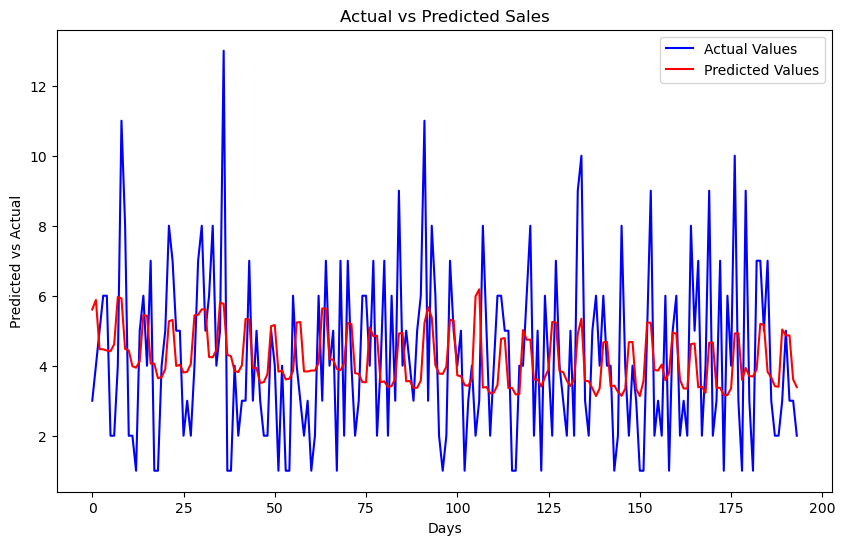

In [26]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='b')
plt.plot(lstm_predictions_actual, label='Predicted Values', color='r')
plt.xlabel('Days')
plt.ylabel('Predicted vs Actual')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

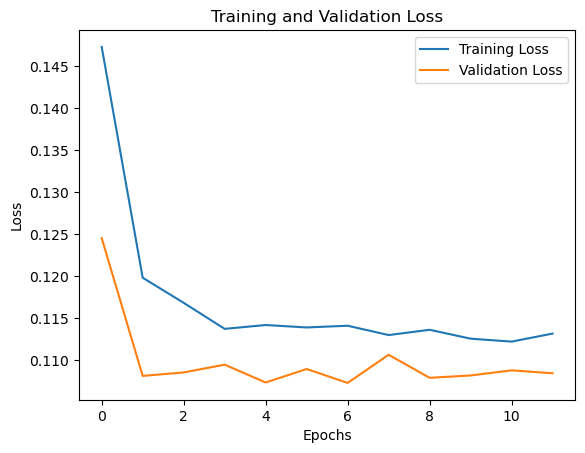

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


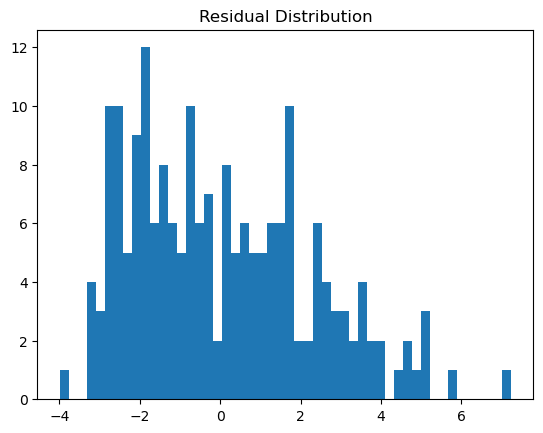

In [28]:
residuals = y_test_actual - lstm_predictions_actual
plt.hist(residuals, bins=50)
plt.title('Residual Distribution')
plt.show()
